<img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png">

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Researching the Momentum Factor

Momentum investing says that excess returns can be generated by buying recent winners and selling recent losers. In this notebook we will research the momentum factor on our universe of demo stocks. This will help us determine whether we have a profitable idea before turning to a full backtest.  

First, load your historical data into pandas.

In [7]:
from quantrocket import get_prices
prices = get_prices("demo-stocks-1d", start_date="2010-01-01", fields=["Close"])
prices.head()

ConId             8719    13977   265598  272093
Field Date                                      
Close 2010-01-04   64.68   69.15  30.575   30.95
      2010-01-05   63.93   69.42  30.625   30.96
      2010-01-06   64.45   70.02  30.140   30.77
      2010-01-07   63.99   69.80  30.085   30.45
      2010-01-08   64.21   69.52  30.285   30.66

Next, we use closing prices to calculate our momentum factor. We calculate momentum using a twelve-month window but excluding the most recent month, as commonly recommended by academic papers. 

In [8]:
closes = prices.loc["Close"]

MOMENTUM_WINDOW = 252 # 12 months = 252 trading days
RANKING_PERIOD_GAP = 22 # 1 month = 22 trading days
earlier_closes = closes.shift(MOMENTUM_WINDOW)
later_closes = closes.shift(RANKING_PERIOD_GAP)
momentum_returns = (later_closes - earlier_closes) / earlier_closes

Now that we have the twelve-month returns, we calculate the next day returns:

In [9]:
next_day_returns = closes.pct_change().shift(-1)

To see if the twelve-month returns predict next-day returns, we will split the twelve-month returns into bins and look at the mean next-day return of each bin. To do this, we first need to stack our wide-form DataFrames into Series. 

In [10]:
momentum_returns = momentum_returns.stack(dropna=False)
next_day_returns = next_day_returns.stack(dropna=False)

Use pandas' `qcut` function to create the bins: 

In [11]:
import pandas as pd

# For a very small demo universe, you might only want 2 quantiles 
num_bins = 2
bins = pd.qcut(momentum_returns, num_bins)

Now group the next day returns by momentum bin and plot the mean return:

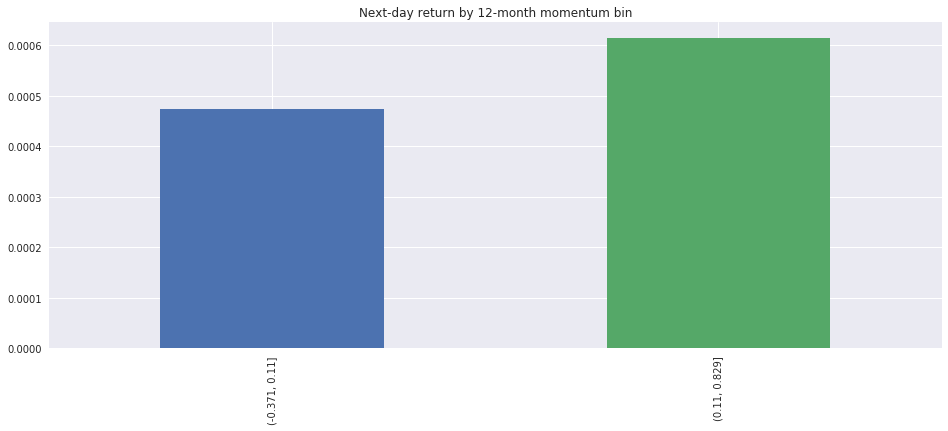

In [12]:
next_day_returns.groupby(bins).mean().plot(kind="bar", title="Next-day return by 12-month momentum bin")

For a predictive factor, the higher quantiles should perform better than the lower quantiles.

***

## *Next Up*

Part 2: [Moonshot Strategy Code](Part2-Moonshot-Strategy-Code.ipynb)